## Simple Linear Regression
#1.Delivery_time -> Predict delivery time using sorting time

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
#EDA and DataVisualization

In [3]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
df.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [5]:
len(df)

21

In [6]:
df.ndim

2

In [7]:
df.shape

(21, 2)

In [8]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [9]:
df.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Delivery Time,21.0,16.790952,5.074901,8.0,13.5,17.83,19.75,29.0
Sorting Time,21.0,6.190476,2.542028,2.0,4.0,6.00,8.00,10.0


In [12]:
df.duplicated().sum()

0

In [13]:
 df["Delivery Time"].nunique()

21

In [14]:
df.columns=("Delivery_time","Sorting_time")
df.head()

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


<AxesSubplot:xlabel='Delivery_time', ylabel='Density'>

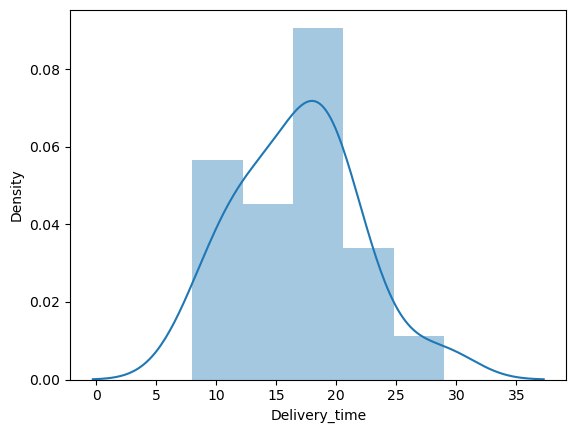

In [15]:
sns.distplot(df.Delivery_time)

<AxesSubplot:xlabel='Delivery_time', ylabel='Density'>

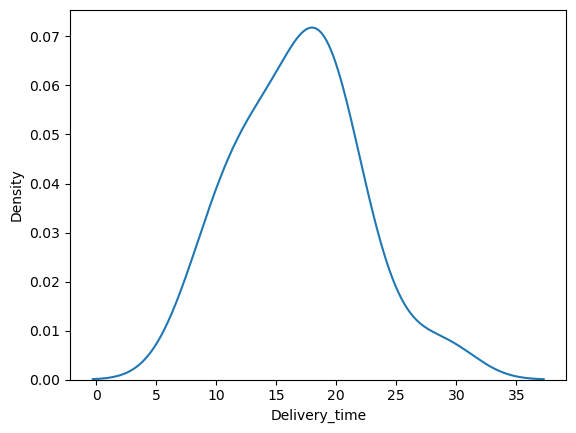

In [16]:
sns.kdeplot(df.Delivery_time)

<AxesSubplot:>

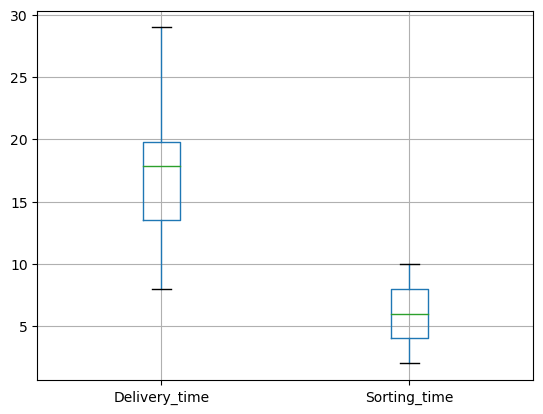

In [17]:
df.boxplot()

In [18]:
np.median(df["Delivery_time"])

17.83

In [19]:
np.mean(df["Delivery_time"]) #median>mean(left Skew)

16.79095238095238

In [20]:
#Correlation Analysis

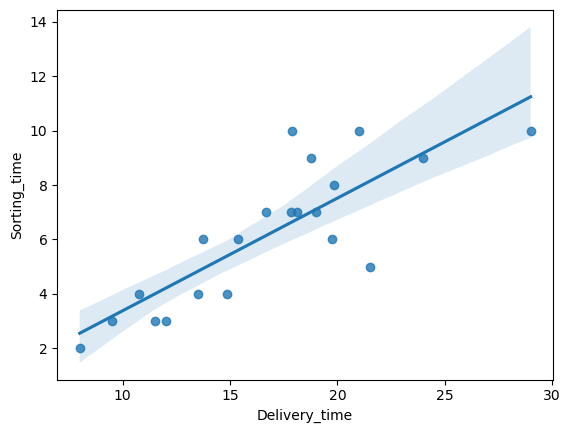

In [21]:
sns.regplot(x="Delivery_time",y="Sorting_time",data=df)
plt.show()

In [22]:
df.corr()

,Delivery_time,Sorting_time
Delivery_time,1.000000,0.825997
Sorting_time,0.825997,1.000000


<AxesSubplot:>

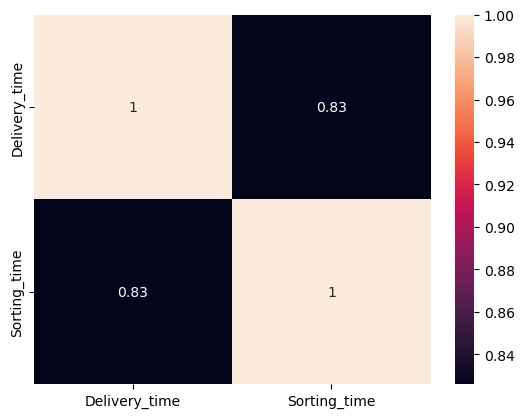

In [23]:
sns.heatmap(df.corr(),annot=True)

In [25]:
import statsmodels.formula.api as smf

In [26]:
model=smf.ols("Delivery_time~Sorting_time",data=df).fit()
model

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           3.98e-06
Time:                        14:52:14   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
model.params #slope(B1) and #intercept(Bo)

Intercept       6.582734
Sorting_time    1.649020
dtype: float64

In [29]:
print(f"t value is\n{model.tvalues}\nP value is\n{model.pvalues}")

t value is
Intercept       3.823349
Sorting_time    6.387447
dtype: float64
P value is
Intercept       0.001147
Sorting_time    0.000004
dtype: float64


In [30]:
print(f"rsquared= {model.rsquared},\nAdj.rsquared= {model.rsquared_adj}")

rsquared= 0.6822714748417231,
Adj.rsquared= 0.6655489208860244


In [32]:
model1=smf.ols("np.sqrt(Delivery_time)~np.sqrt(Sorting_time)",data=df).fit()

In [33]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(Delivery_time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Tue, 03 Oct 2023   Prob (F-statistic):           8.48e-07
Time:                            14:53:24   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(Sorting_time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
model1.params #slope(B1) and #intercept(Bo)

Intercept                1.613479
np.sqrt(Sorting_time)    1.002217
dtype: float64

In [35]:
print(f"t value is\n{model1.tvalues}\nP value is\n{model1.pvalues}\n")
print(f"rsquared= {model1.rsquared},\nAdj.rsquared= {model1.rsquared_adj}")

t value is
Intercept                4.628248
np.sqrt(Sorting_time)    7.152817
dtype: float64
P value is
Intercept                1.833621e-04
np.sqrt(Sorting_time)    8.475706e-07
dtype: float64

rsquared= 0.7292011987544664,
Adj.rsquared= 0.7149486302678594


In [36]:
model2 = smf.ols('np.cbrt(Delivery_time)~np.cbrt(Sorting_time)' , data=df).fit()
model2

In [37]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.cbrt(Delivery_time)   R-squared:                       0.744
Model:                                OLS   Adj. R-squared:                  0.731
Method:                     Least Squares   F-statistic:                     55.25
Date:                    Tue, 03 Oct 2023   Prob (F-statistic):           4.90e-07
Time:                            14:54:16   Log-Likelihood:                 13.035
No. Observations:                      21   AIC:                            -22.07
Df Residuals:                          19   BIC:                            -19.98
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(Sorting_time)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
model2.params #slope(B1) and #intercept(Bo)

Intercept                1.013571
np.cbrt(Sorting_time)    0.845585
dtype: float64

In [39]:
print(f"t value is\n{model2.tvalues}\nP value is\n{model2.pvalues}\n")
print(f"rsquared= {model2.rsquared}\nAdj.rsquared= {model2.rsquared_adj}")

t value is
Intercept                4.900067
np.cbrt(Sorting_time)    7.433210
dtype: float64
P value is
Intercept                9.941770e-05
np.cbrt(Sorting_time)    4.904127e-07
dtype: float64

rsquared= 0.7441167577566271
Adj.rsquared= 0.7306492186911864


In [40]:
model3=smf.ols("np.log(Delivery_time)~np.log(Sorting_time)",data=df).fit()
model3

In [41]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Tue, 03 Oct 2023   Prob (F-statistic):           1.60e-07
Time:                           14:55:17   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
model3.params #slope(B1) and #intercept(Bo)

Intercept               1.741987
np.log(Sorting_time)    0.597522
dtype: float64

In [43]:
print(f"t value is\n{model3.tvalues}\nP value is\n{model3.pvalues}\n")
print(f"rsquared= {model3.rsquared}\nAdj.rsquared= {model3.rsquared_adj}")

t value is
Intercept               13.085552
np.log(Sorting_time)     8.024484
dtype: float64
P value is
Intercept               5.921137e-11
np.log(Sorting_time)    1.601539e-07
dtype: float64

rsquared= 0.77216134926874
Adj.rsquared= 0.7601698413355158


In [44]:
model1_pred =np.square(model1.predict(df['Sorting_time']))
model2_pred =pow(model2.predict(df['Sorting_time']),3)
model3_pred =np.exp(model3.predict(df['Sorting_time']))

In [45]:
from sklearn.metrics import mean_squared_error 

In [46]:
model1_rmse =np.sqrt(mean_squared_error(df['Delivery_time'], model1_pred))
model2_rmse =np.sqrt(mean_squared_error(df['Delivery_time'], model2_pred))
model3_rmse =np.sqrt(mean_squared_error(df['Delivery_time'], model3_pred))

In [48]:
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse)

model= 2.9349037688901394 
model1= 2.7622942793208676 
model2= 2.7555843098935746 
model3= 2.7458288976145493


In [49]:
model3.rsquared,model3.rsquared_adj

(0.77216134926874, 0.7601698413355158)

In [50]:
#Prediction

In [51]:
df1=pd.Series([4,10])
df1

0     4
1    10
dtype: int64

In [52]:
df1_pred=pd.DataFrame(df1,columns=['Sorting_time'])
df1_pred

,Sorting_time
0,4
1,10


In [53]:
model3.predict(df1_pred)

0    2.570329
1    3.117833
dtype: float64

# 2.Salary_hike -> Build a prediction model for Salary_hike

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [56]:
df=pd.read_csv("Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [57]:
#EDA and Visualization

In [58]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [59]:
len (df)

30

In [60]:
df.ndim

2

In [61]:
df.shape

(30, 2)

In [62]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [63]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [65]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [66]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


In [67]:
df.duplicated().sum()

0

In [68]:
 df.nunique()

YearsExperience    28
Salary             30
dtype: int64

In [69]:
df.columns=("YearsExp","Salary")
df.head()

,YearsExp,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


<AxesSubplot:xlabel='YearsExp', ylabel='Density'>

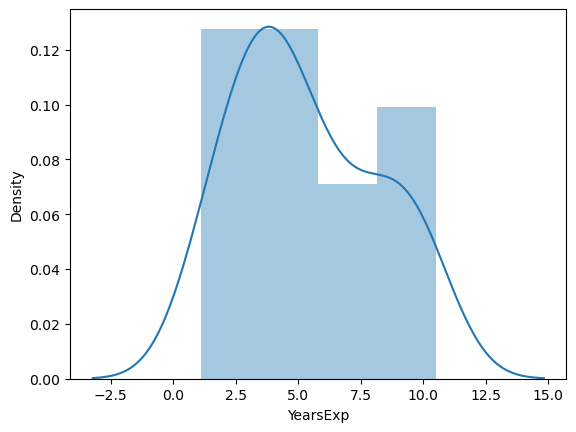

In [70]:
sns.distplot(df.YearsExp)

<AxesSubplot:xlabel='Salary', ylabel='Density'>

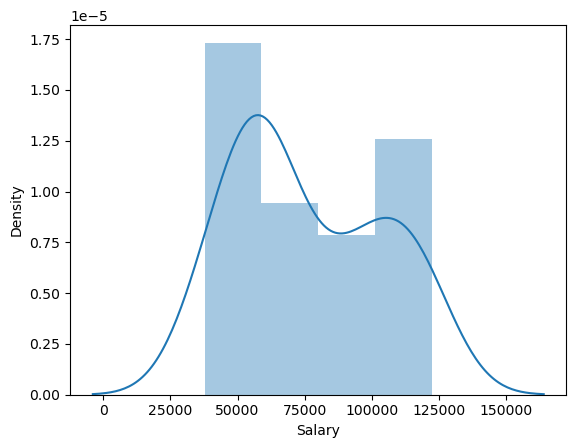

In [71]:
sns.distplot(df.Salary)

<AxesSubplot:xlabel='Salary', ylabel='Density'>

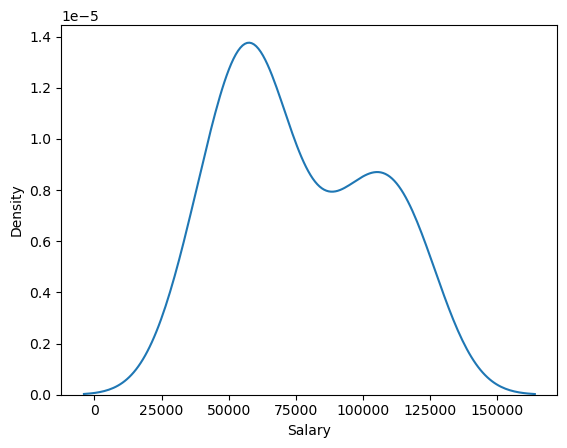

In [72]:
sns.kdeplot(df.Salary)

{'whiskers': [<matplotlib.lines.Line2D at 0x204520496a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2045210b0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x204520490a0>],
 'medians': [<matplotlib.lines.Line2D at 0x2045210bc70>],
 'fliers': [<matplotlib.lines.Line2D at 0x2045210bfd0>],
 'means': [<matplotlib.lines.Line2D at 0x2045210bb80>]}

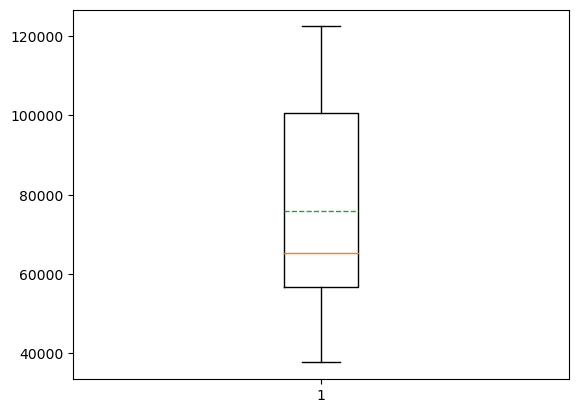

In [73]:
plt.boxplot(df["Salary"],showmeans=True,meanline=True)

In [74]:
np.median(df["Salary"])

65237.0

In [75]:
np.mean(df["Salary"]) #Mean>median>>>Right Skew

76003.0

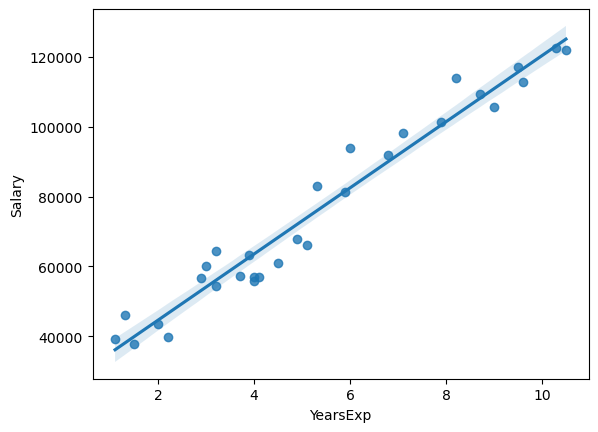

In [76]:
sns.regplot(x="YearsExp",y="Salary",data=df)
plt.show()

In [78]:
#Correlation Analysis

In [79]:
df.corr()

,YearsExp,Salary
YearsExp,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

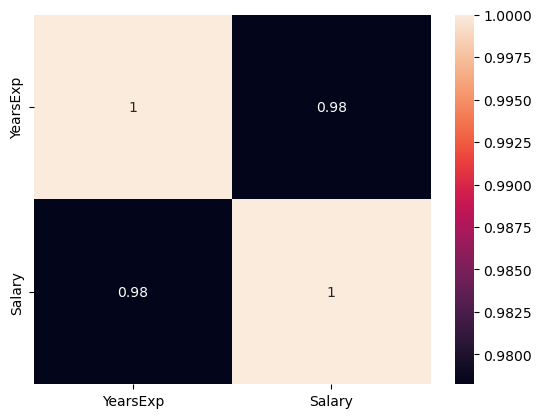

In [80]:
sns.heatmap(df.corr(),annot=True)

In [82]:
#Model Building And Testing

In [83]:
import statsmodels.formula.api as smf

In [84]:
model=smf.ols("Salary~YearsExp",data=df).fit()
model

In [85]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           1.14e-20
Time:                        15:08:49   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExp    9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
model.params

Intercept    25792.200199
YearsExp      9449.962321
dtype: float64

In [87]:
print(f"t value is\n{model.tvalues}\nP value is\n{model.pvalues}\n")
print(f"rsquared= {model.rsquared},\nAdj.rsquared= {model.rsquared_adj}")  #slope(B1) and #intercept(Bo)

t value is
Intercept    11.346940
YearsExp     24.950094
dtype: float64
P value is
Intercept    5.511950e-12
YearsExp     1.143068e-20
dtype: float64

rsquared= 0.9569566641435086,
Adj.rsquared= 0.9554194021486339


In [88]:
model1=smf.ols("np.sqrt(Salary)~np.sqrt(YearsExp)",data=df).fit()
model1

In [89]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           7.58e-19
Time:                        15:09:36   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExp)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
model2 = smf.ols('np.cbrt(Salary)~np.cbrt(YearsExp)',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           6.37e-18
Time:                        15:09:49   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(YearsExp)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
model3 = smf.ols('np.log(Salary)~np.log(YearsExp)',data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           7.40e-16
Time:                        15:10:01   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExp)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
model1_pred =np.square(model1.predict(df['YearsExp']))
model2_pred =pow(model2.predict(df['YearsExp']),3)
model3_pred =np.exp(model3.predict(df['YearsExp']))

In [93]:
from sklearn.metrics import mean_squared_error 

In [94]:
model1_rmse =np.sqrt(mean_squared_error(df['Salary'], model1_pred))
model2_rmse =np.sqrt(mean_squared_error(df['Salary'], model2_pred))
model3_rmse =np.sqrt(mean_squared_error(df['Salary'], model3_pred))

In [95]:
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse)

model= 5788.315051119395 
model1= 5960.647096174306 
model2= 6232.815455835857 
model3= 7219.716974372746


In [96]:
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [97]:
#Prediction

In [98]:
new=pd.Series([1.9,2.7])
new

0    1.9
1    2.7
dtype: float64

In [99]:
df1_pred=pd.DataFrame(new,columns=["YearsExp"])
df1_pred

,YearsExp
0,1.9
1,2.7


In [100]:
model.predict(df1_pred)

0    43747.128609
1    51307.098467
dtype: float64